# Làm bài tập thực hành về COVID-19 Pandemic

## Loading Data

We will use data on COVID-19 infected individuals, provided by the [Center for Systems Science and Engineering](https://systems.jhu.edu/) (CSSE) at [Johns Hopkins University](https://jhu.edu/). Dataset is available in [this GitHub Repository](https://github.com/CSSEGISandData/COVID-19).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

We can load the most recent data directly from GitHub using `pd.read_csv`. If for some reason the data is not available, you can always use the copy available locally in the `data` folder - just uncomment the line below that defines `base_url`:

In [2]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

Let's now load the data for infected individuals and see how the data looks like:

In [3]:
infected = pd.read_csv(infected_dataset_url)
infected.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


We can see that each row of the table defines the number of infected individuals for each country and/or province, and columns correspond to dates. Similar tables can be loaded for other data, such as number of recovered and number of deaths.

In [4]:
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)

## Making Sense of the Data

Bước này chúng ta đã biết dữ liệu có thông tin ở cả cột Quốc gia và cột Tỉnh/tiểu bang nên cần dùng hàm `sum` để xử lý số liệu cộng gộp.

## Pre-processing the Data

We are not interested in breaking countries down to further territories, thus we would first get rid of this breakdown and add information on all territories together, to get info for the whole country. This can be done using `groupby`:

In [5]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,33.93911,67.709953,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,41.15330,20.168300,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,28.03390,1.659600,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,42.50630,1.521800,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,-11.20270,17.873900,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


Dữ liệu mới sau khi `groupby` thì còn dư 3 cột là **Tỉnh/tiểu bang, Latitude và Longtitude**, có thể dùng hàm `.loc` hoặc hàm `drop`.

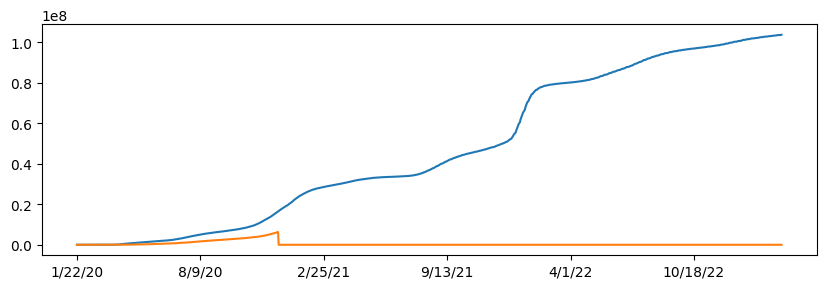

In [6]:
# Dùng hàm .loc
infected.loc['US'][3:].plot()
recovered.loc['US'][3:].plot()
plt.show()

In [9]:
# Dùng hàm drop
# infected.drop(columns=['Province/State','Lat','Long'],inplace=True)
# recovered.drop(columns=['Province/State','Lat','Long'],inplace=True)
# deaths.drop(columns=['Province/State','Lat','Long'],inplace=True)
print(infected.info())
recovered.head()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, Afghanistan to Zimbabwe
Columns: 1143 entries, 1/22/20 to 3/9/23
dtypes: int64(1143)
memory usage: 1.8+ MB
None


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Investigating the Data

Let's now switch to investigating a specific country. Let's create a frame that contains the data on infections indexed by date:

In [12]:
# Tổng hợp số liệu theo từng quốc gia
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df

df_vietnam = mkframe('Vietnam')
df.head()

df_china = mkframe('China')
df_china.head()

<ipython-input-12-ae0fe7705acd>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)
<ipython-input-12-ae0fe7705acd>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)


,infected,recovered,deaths
2020-01-22,548,28,17
2020-01-23,643,30,18
2020-01-24,920,36,26
2020-01-25,1406,39,42
2020-01-26,2075,49,56


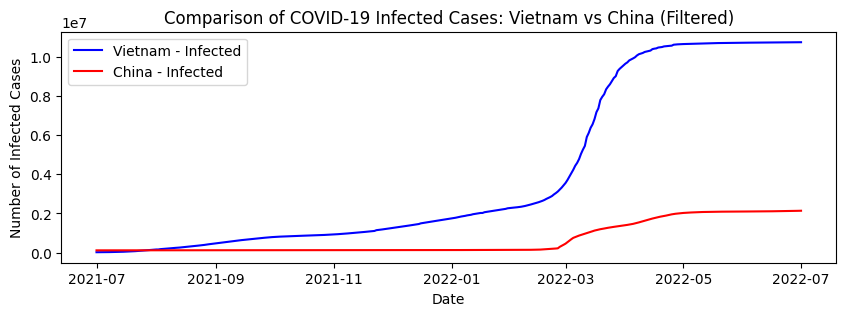

In [13]:
# So sánh sự lây nhiễm của Vietnam và China
# Lọc khoảng thời gian từ '2021-07-01':'2022-07-01'
df_vietnam_filtered = df_vietnam.loc['2021-07-01':'2022-07-01']
df_china_filtered = df_china.loc['2021-07-01':'2022-07-01']

# Vẽ lại biểu đồ với dữ liệu lọc
plt.plot(df_vietnam_filtered.index, df_vietnam_filtered['infected'], label='Vietnam - Infected', color='b')
plt.plot(df_china_filtered.index, df_china_filtered['infected'], label='China - Infected', color='r')

plt.title('Comparison of COVID-19 Infected Cases: Vietnam vs China (Filtered)')
plt.xlabel('Date')
plt.ylabel('Number of Infected Cases')
plt.legend() # Có chú thích
plt.grid(False) # Không có lưới
plt.show()


In [14]:
# Dân số
countries = pd.read_csv(countries_dataset_url)
countries

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.949900,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4316,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4317,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4318,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0
4319,84056043,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805.0


Xử lý cộng gộp số liệu đối với các nước có trường Province, ví dụ China

In [15]:
countries[(countries['Country_Region']=='China') & countries['Province_State'].isna()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
880,156,CN,CHN,156.0,NaN,NaN,NaN,China,35.8617,104.19545,China,1.411779e+09


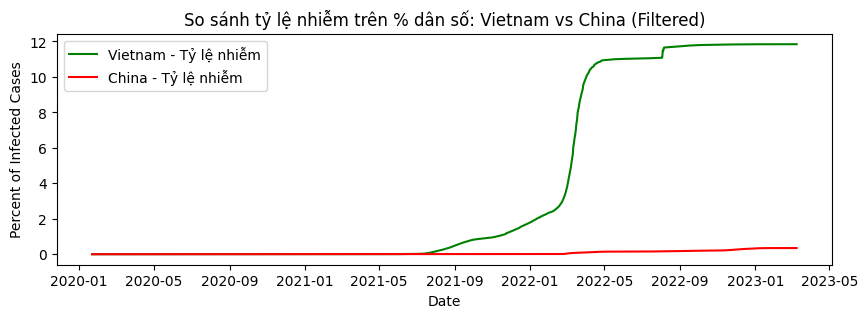

In [20]:
# Tính toán tỷ lệ nhiễm
pop_china = countries[(countries['Country_Region']=='China') & countries['Province_State'].isna()]['Population'].iloc[0]
df_china['pinfected'] = df_china['infected']*100 / pop_china
df_china['precovered'] = df_china['recovered']*100 / pop_china
df_china['pdeaths'] = df_china['deaths']*100 / pop_china

pop_vietnam = countries[(countries['Country_Region']=='Vietnam') & countries['Province_State'].isna()]['Population'].iloc[0]
df_vietnam['pinfected'] = df_vietnam['infected']*100 / pop_vietnam

# Vẽ biểu đồ so sánh
plt.plot(df_vietnam.index, df_vietnam['pinfected'], label='Vietnam - Tỷ lệ nhiễm', color='g')
plt.plot(df_china.index, df_china['pinfected'], label='China - Tỷ lệ nhiễm', color='r')

plt.title('So sánh tỷ lệ nhiễm trên % dân số: Vietnam vs China (Filtered)')
plt.xlabel('Date')
plt.ylabel('Percent of Infected Cases')
plt.legend() # Có chú thích
plt.grid(False) # Không có lưới
plt.show()


## Computing $R_t$

To see how infectious is the disease, we look at the **basic reproduction number** $R_0$, which indicated the number of people that an infected person would further infect. When $R_0$ is more than 1, the epidemic is likely to spread.

$R_0$ is a property of the disease itself, and does not take into account some protective measures that people may take to slow down the pandemic. During the pandemic progression, we can estimate the reproduction number $R_t$ at any given time $t$. It has been shown that this number can be roughly estimated by taking a window of 8 days, and computing $$R_t=\frac{I_{t-7}+I_{t-6}+I_{t-5}+I_{t-4}}{I_{t-3}+I_{t-2}+I_{t-1}+I_t}$$
where $I_t$ is the number of newly infected individuals on day $t$.

Let's compute $R_t$ for our pandemic data. To do this, we will take a rolling window of 8 `ninfected` values, and apply the function to compute the ratio above:

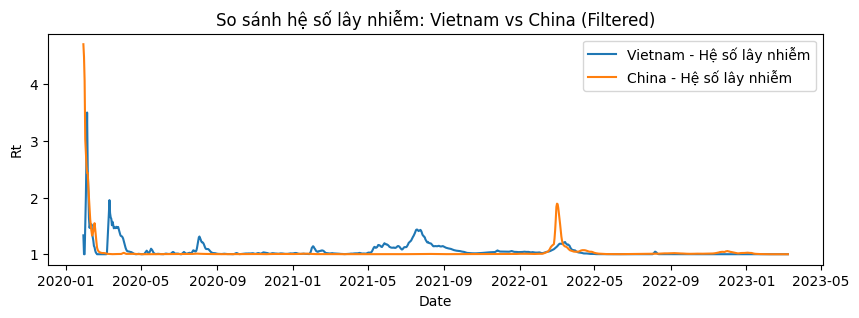

In [25]:
# Tính toán Hệ số lây nhiễm Rt
df_china['Rt'] = df_china['infected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
# df_china['Rt'].plot()

df_vietnam['Rt'] = df_vietnam['infected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
# df_vietnam['Rt'].plot()

# Vẽ biểu đồ so sánh
plt.plot(df_vietnam.index, df_vietnam['Rt'], label='Vietnam - Hệ số lây nhiễm')
plt.plot(df_china.index, df_china['Rt'], label='China - Hệ số lây nhiễm')

plt.title('So sánh hệ số lây nhiễm: Vietnam vs China (Filtered)')
plt.xlabel('Date')
plt.ylabel('Rt')
plt.legend() # Có chú thích
plt.grid(False) # Không có lưới
plt.show()

In [26]:
# Tính hệ số tương quan cho df_china
correlation_china = df_china[['infected', 'recovered', 'deaths']].corr()
print("Correlation Matrix for China:")
print(correlation_china)

Correlation Matrix for China:
           infected  recovered    deaths
infected   1.000000  -0.570038  0.752164
recovered -0.570038   1.000000 -0.333678
deaths     0.752164  -0.333678  1.000000


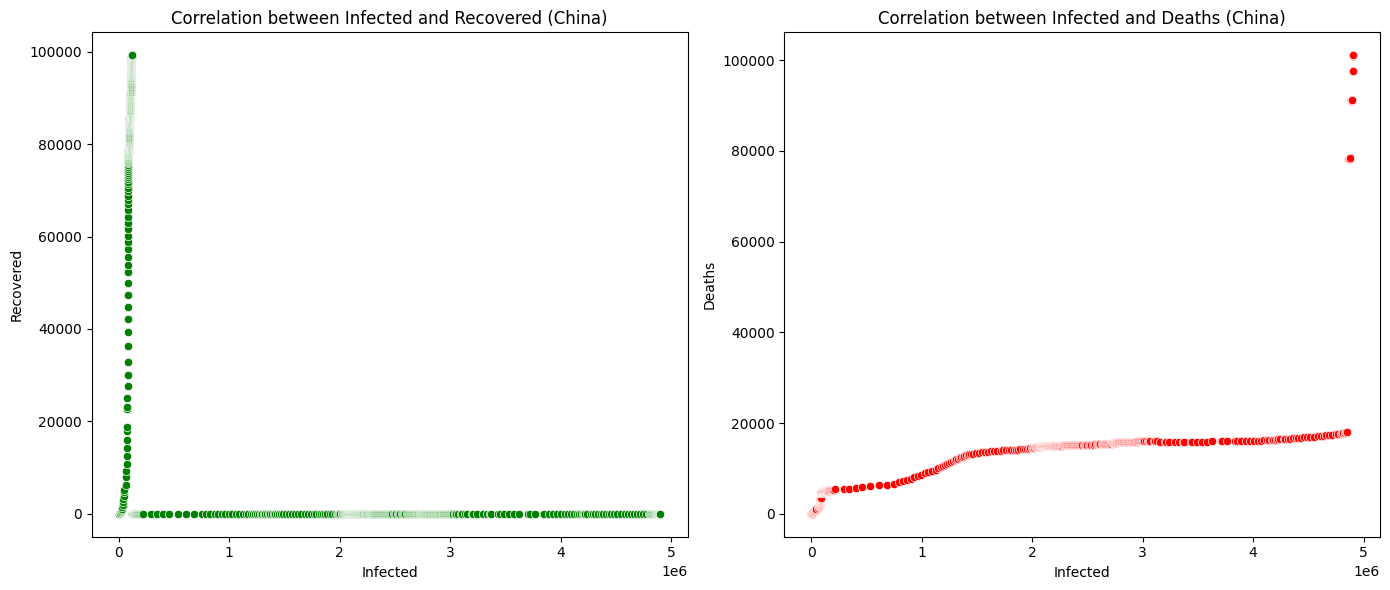

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Biểu đồ tương quan giữa infected và recovered
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_china, x='infected', y='recovered', color='g')
plt.title('Correlation between Infected and Recovered (China)')
plt.xlabel('Infected')
plt.ylabel('Recovered')

# Biểu đồ tương quan giữa infected và deaths
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_china, x='infected', y='deaths', color='r')
plt.title('Correlation between Infected and Deaths (China)')
plt.xlabel('Infected')
plt.ylabel('Deaths')

plt.tight_layout()
plt.show()

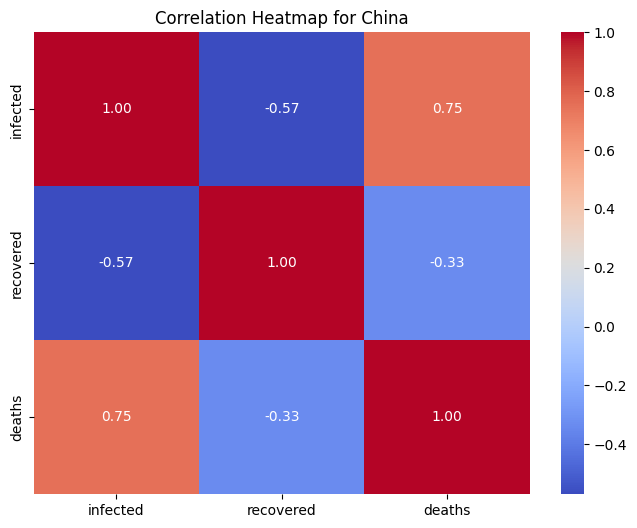

In [29]:
# Biểu đồ Heat_map
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_china, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for China')
plt.show()

In [27]:
# Tính hệ số tương quan cho df_vietnam
correlation_vietnam = df_vietnam[['infected', 'recovered', 'deaths']].corr()
print("Correlation Matrix for Vietnam:")
print(correlation_vietnam)

Correlation Matrix for Vietnam:
           infected  recovered    deaths
infected   1.000000  -0.207513  0.905075
recovered -0.207513   1.000000 -0.256090
deaths     0.905075  -0.256090  1.000000


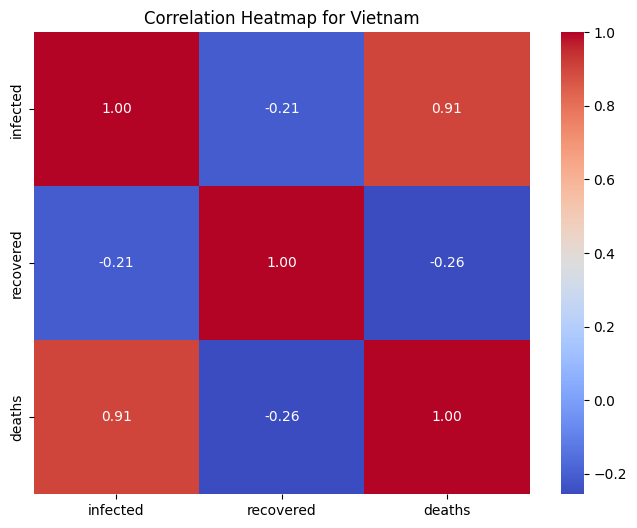

In [30]:
# Vẽ biểu đồ Heat_map thể hiện mức độ tương quan
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_vietnam, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Vietnam')
plt.show()

1.Tỷ lệ tử vong (death_rate) và hồi phục (recovery_rate) có xu hướng bão hòa sau một khoảng thời gian nhất định.

2.Thời gian trung bình của căn bệnh:
Được xác định từ ngày nhiễm đầu tiên đến khi tỷ lệ tử vong và hồi phục ổn định.

3.Bất thường tiềm ẩn:
Đột biến tỷ lệ tử vong.
Tỷ lệ hồi phục thấp bất thường trong một giai đoạn cụ thể.

In [31]:
# Chúng ta sẽ tạo các cột mới trong DataFrame để tính toán tỷ lệ:
# death_rate = deaths / infected
# recovery_rate = recovered / infected

# Tính tỷ lệ tử vong và hồi phục cho Vietnam
df_vietnam['death_rate'] = df_vietnam['deaths'] / df_vietnam['infected']
df_vietnam['recovery_rate'] = df_vietnam['recovered'] / df_vietnam['infected']

# Tính tỷ lệ tử vong và hồi phục cho China
df_china['death_rate'] = df_china['deaths'] / df_china['infected']
df_china['recovery_rate'] = df_china['recovered'] / df_china['infected']


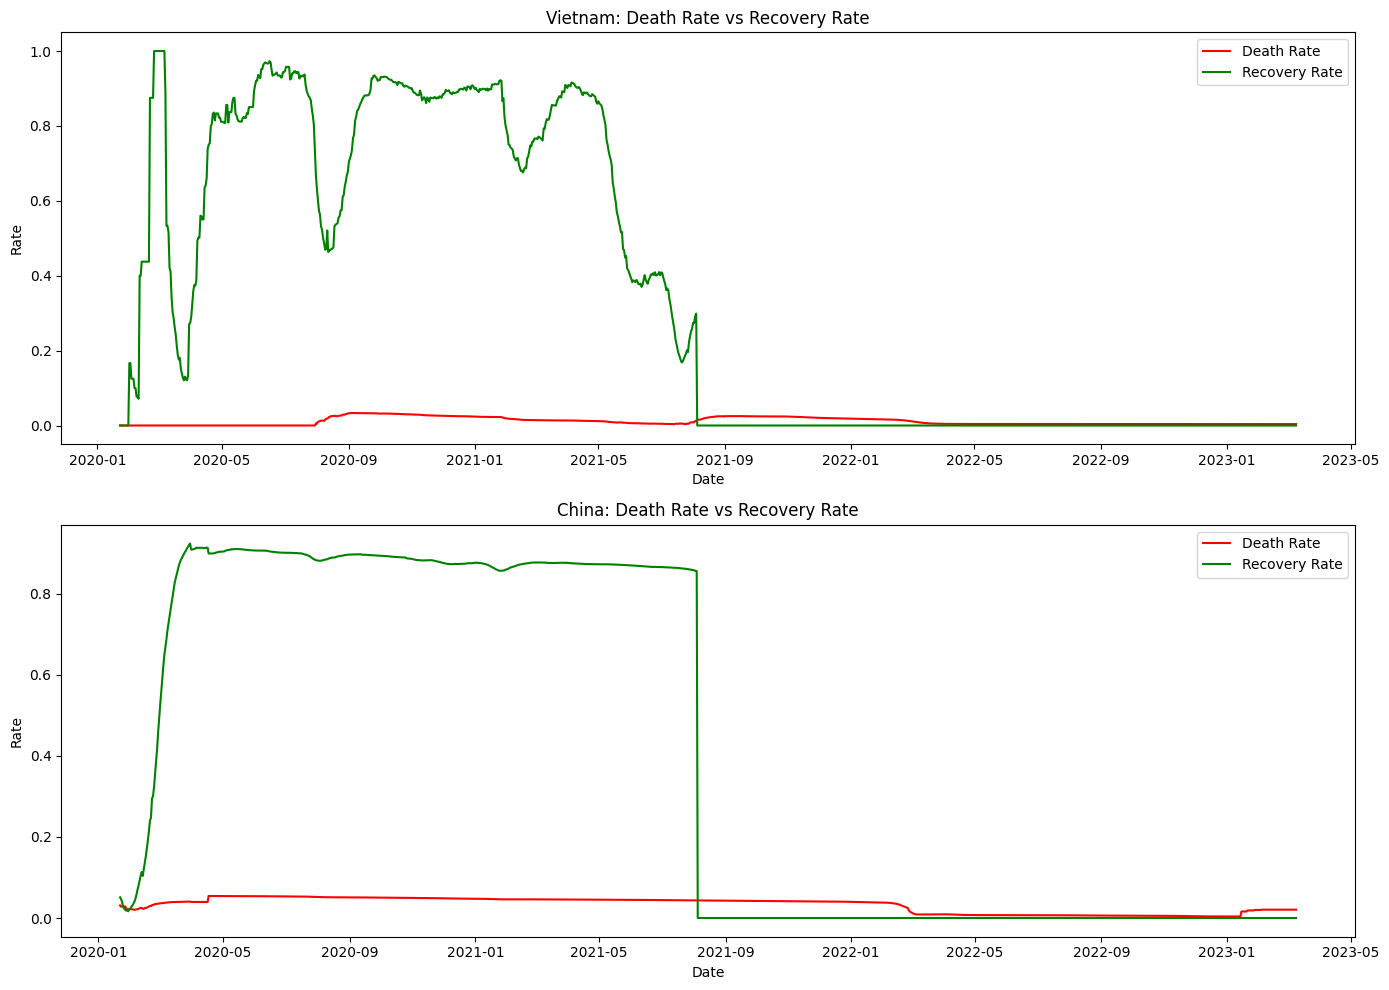

In [32]:
import matplotlib.pyplot as plt

# Tạo biểu đồ so sánh tỷ lệ tử vong và hồi phục
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Biểu đồ cho Việt Nam
axes[0].plot(df_vietnam.index, df_vietnam['death_rate'], label='Death Rate', color='r')
axes[0].plot(df_vietnam.index, df_vietnam['recovery_rate'], label='Recovery Rate', color='g')
axes[0].set_title('Vietnam: Death Rate vs Recovery Rate')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Rate')
axes[0].legend()
axes[0].grid(False)

# Biểu đồ cho Trung Quốc
axes[1].plot(df_china.index, df_china['death_rate'], label='Death Rate', color='r')
axes[1].plot(df_china.index, df_china['recovery_rate'], label='Recovery Rate', color='g')
axes[1].set_title('China: Death Rate vs Recovery Rate')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Rate')
axes[1].legend()
axes[1].grid(False)

plt.tight_layout()
plt.show()

In [33]:
# Tính thời gian kéo dài căn bệnh
# Tìm ngày tỷ lệ hồi phục và tử vong ổn định
recovery_stable_vietnam = df_vietnam['recovery_rate'].idxmax()
death_stable_vietnam = df_vietnam['death_rate'].idxmax()

recovery_stable_china = df_china['recovery_rate'].idxmax()
death_stable_china = df_china['death_rate'].idxmax()

print("Vietnam - Recovery Stable Date:", recovery_stable_vietnam)
print("Vietnam - Death Stable Date:", death_stable_vietnam)
print("China - Recovery Stable Date:", recovery_stable_china)
print("China - Death Stable Date:", death_stable_china)


Vietnam - Recovery Stable Date: 2020-02-25 00:00:00
Vietnam - Death Stable Date: 2020-09-03 00:00:00
China - Recovery Stable Date: 2020-03-30 00:00:00
China - Death Stable Date: 2020-04-17 00:00:00


In [34]:
# Kiểm tra bất thường ở Vietnam
print(df_vietnam[df_vietnam['death_rate'] > 0.1])  # Tỷ lệ tử vong > 10%
print(df_vietnam[df_vietnam['recovery_rate'] < 0.5])  # Tỷ lệ hồi phục < 50%

# Kiểm tra bất thường ở China
print(df_china[df_china['death_rate'] > 0.1])  # Tỷ lệ tử vong > 10%
print(df_china[df_china['recovery_rate'] < 0.5])  # Tỷ lệ hồi phục < 50%

Empty DataFrame
Columns: [infected, recovered, deaths, pinfected, Rt, death_rate, recovery_rate]
Index: []
            infected  recovered  deaths  pinfected        Rt  death_rate  \
2020-01-23         2          0       0   0.000002       NaN    0.000000   
2020-01-24         2          0       0   0.000002       NaN    0.000000   
2020-01-25         2          0       0   0.000002       NaN    0.000000   
2020-01-26         2          0       0   0.000002       NaN    0.000000   
2020-01-27         2          0       0   0.000002       NaN    0.000000   
...              ...        ...     ...        ...       ...         ...   
2023-03-05  11526966          0   43186  11.842135  1.000004    0.003747   
2023-03-06  11526966          0   43186  11.842135  1.000003    0.003747   
2023-03-07  11526986          0   43186  11.842155  1.000003    0.003747   
2023-03-08  11526994          0   43186  11.842163  1.000003    0.003747   
2023-03-09  11526994          0   43186  11.842163  1.000

Chúng ta sẽ tính toán và phân tích tỷ lệ tử vong (death_rate) của Việt Nam và Trung Quốc, đồng thời xem xét xu hướng thay đổi theo thời gian.

Để tăng độ chính xác, chúng ta sẽ xem xét:

* Độ trễ giữa số ca nhiễm (infected) và số ca tử vong (deaths). Thời gian ủ bệnh là 14 ngày.
* Chuỗi thời gian dịch bệnh để hiểu rõ hơn cách tỷ lệ tử vong thay đổi qua từng giai đoạn.

In [35]:
import pandas as pd

# Dịch cột deaths lùi lại 14 ngày để tính độ trễ
df_vietnam['deaths_lagged'] = df_vietnam['deaths'].shift(-14)
df_china['deaths_lagged'] = df_china['deaths'].shift(-14)

# Tính tỷ lệ tử vong (deaths lagged / infected)
df_vietnam['death_rate'] = df_vietnam['deaths_lagged'] / df_vietnam['infected']
df_china['death_rate'] = df_china['deaths_lagged'] / df_china['infected']

# Loại bỏ các giá trị NaN do dịch chuyển
df_vietnam = df_vietnam.dropna(subset=['death_rate'])
df_china = df_china.dropna(subset=['death_rate'])


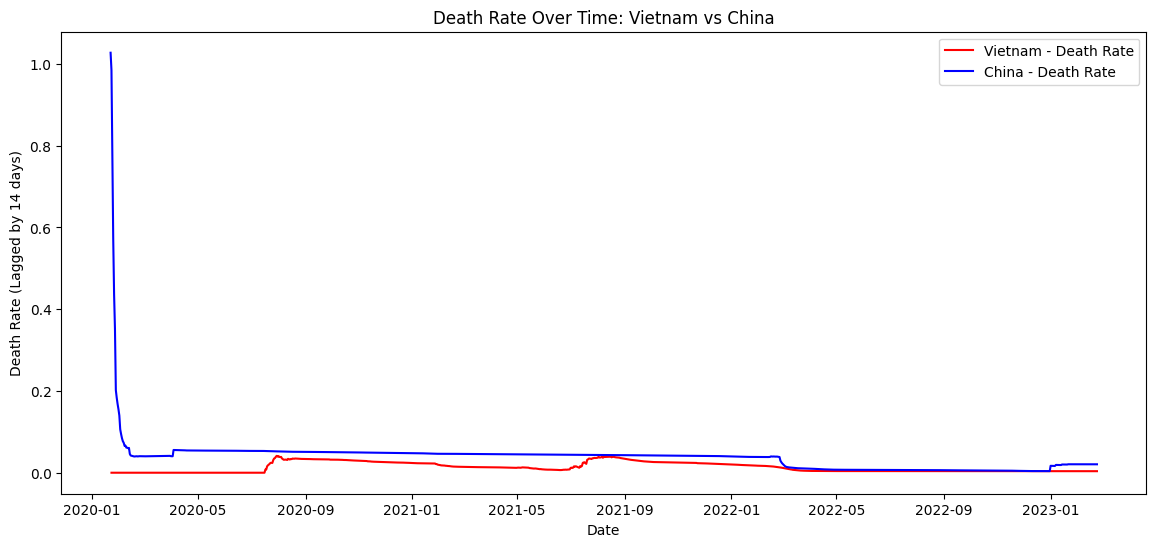

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Vẽ tỷ lệ tử vong cho Việt Nam
plt.plot(df_vietnam.index, df_vietnam['death_rate'], label='Vietnam - Death Rate', color='r')

# Vẽ tỷ lệ tử vong cho Trung Quốc
plt.plot(df_china.index, df_china['death_rate'], label='China - Death Rate', color='b')

# Tuỳ chỉnh biểu đồ
plt.title('Death Rate Over Time: Vietnam vs China')
plt.xlabel('Date')
plt.ylabel('Death Rate (Lagged by 14 days)')
plt.legend()
plt.grid(False)
plt.show()
